<figure>
  <IMG SRC="img/logo.png" WIDTH=150 ALIGN="right">
</figure>

# Project: Analysis of Baku Restaurants Network.Optimal paths for delivery services. Explanation of TSP.
## Network Algorithms
* Authors: Saidanur Sideif-zada  Yusif Ibrahimov  Fahmin Guliyev  Gulshan Mustafayeva
---------

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math
from copy import deepcopy
import numpy as np
import tsp
from networkx.algorithms import tree
from math import inf
%matplotlib inline

## Importing dataset and graph visualization

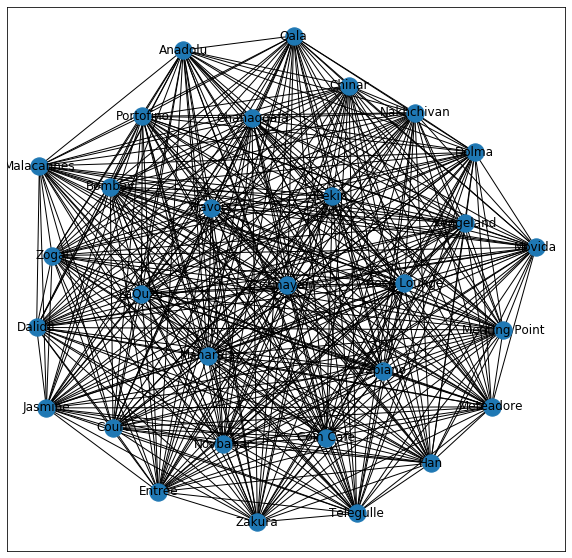

In [3]:
restaurants = pd.read_csv('restaurants.csv')
graph_resto = nx.from_pandas_edgelist(restaurants, source="source", target="target", edge_attr=True)
plt.figure(figsize=(10,10))
nx.draw_networkx(graph_resto, with_labels=True)
plt.savefig('graph_resto.png', dpi=500, bbox_inches='tight')
plt.show()

In [14]:
set(restaurants.source)

{'Anadolu',
 'Bombay',
 'Chanaqqala',
 'Chinar',
 'Coco Lounge',
 'Coin Cafe',
 'Dalida',
 'Dolma',
 'Entree',
 'Flavors',
 'Gunaydin',
 'Han',
 'Jasmine',
 'LaQuzu',
 'Maharaja',
 'Malacannes',
 'Meating Point',
 'Meteadore',
 'Movida',
 'Nakhchivan',
 'Novbahar',
 'Pekin',
 'Portofino',
 'Qala',
 'Telegulle',
 'Vapiano',
 'Xengeland',
 'Zakura',
 'Zogal'}

## Exploring the nodes of the graph. Traversals

### Breadth First Search. Traversing level by level

In [3]:
def bfs_traversal(graph,start_vertex):
    queue = [start_vertex]
    visited = [start_vertex]
    traversal = ""
    while(queue):
        deque = queue.pop(0)
        traversal += deque + ' => '
        for adj in graph.neighbors(deque):
            if adj not in visited:
                visited.append(adj)
                queue.append(adj)
    return traversal[:-4]

In [4]:
# Displaying the BFS Result
bfs_traversal(graph_resto,'Coin Cafe')

'Coin Cafe => Jasmine => Telegulle => Bombay => Movida => Nakhchivan => Portofino => Meteadore => Malacannes => Xengeland => Dolma => Entree => Novbahar => Pekin => Anadolu => Meating Point => Chanaqqala => Chinar => Gunaydin => Zakura => Flavors => Qala => Zogal => Coco Lounge => Han => Vapiano => Maharaja => Dalida => LaQuzu => Court'

### Depth First Search. Traversing by depth

In [11]:
def dfs_traversal(graph,start_vertex):
    stack = [start_vertex]
    visited = [start_vertex]
    traversal = ""
    while(stack):
        sPop = stack.pop()
        traversal += sPop + ' => '
        for adj in graph.neighbors(sPop):
            if adj not in visited:
                visited.append(adj)
                stack.append(adj)
    return traversal[:-4]

In [12]:
# Displaying the DFS Result
dfs_traversal(graph_resto,'Coin Cafe')

'Coin Cafe => Court => LaQuzu => Dalida => Maharaja => Vapiano => Han => Coco Lounge => Zogal => Qala => Flavors => Zakura => Gunaydin => Chinar => Chanaqqala => Meating Point => Anadolu => Pekin => Novbahar => Entree => Dolma => Xengeland => Malacannes => Meteadore => Portofino => Nakhchivan => Movida => Bombay => Telegulle => Jasmine'

## Centrality Metrics

### Global degree connectivity or Node Connectivity

In [7]:
print(nx.node_connectivity(graph_resto))

29


### Degree centrality

In [8]:
print(nx.degree_centrality(graph_resto))

{'Coin Cafe': 1.0, 'Jasmine': 1.0, 'Telegulle': 1.0, 'Bombay': 1.0, 'Movida': 1.0, 'Nakhchivan': 1.0, 'Portofino': 1.0, 'Meteadore': 1.0, 'Malacannes': 1.0, 'Xengeland': 1.0, 'Dolma': 1.0, 'Entree': 1.0, 'Novbahar': 1.0, 'Pekin': 1.0, 'Anadolu': 1.0, 'Meating Point': 1.0, 'Chanaqqala': 1.0, 'Chinar': 1.0, 'Gunaydin': 1.0, 'Zakura': 1.0, 'Flavors': 1.0, 'Qala': 1.0, 'Zogal': 1.0, 'Coco Lounge': 1.0, 'Han': 1.0, 'Vapiano': 1.0, 'Maharaja': 1.0, 'Dalida': 1.0, 'LaQuzu': 1.0, 'Court': 1.0}


### Closeness Centrality

In [25]:
print(nx.closeness_centrality(graph_resto,distance='dist'))

{'Coin Cafe': 0.33375532282195886, 'Jasmine': 0.2982311805841218, 'Telegulle': 0.35587188612099646, 'Bombay': 0.3005492797181055, 'Movida': 0.426094622392007, 'Nakhchivan': 0.38476847552076415, 'Portofino': 0.30123610678300616, 'Meteadore': 0.329208763764332, 'Malacannes': 0.3092673562973232, 'Xengeland': 0.3398968588842006, 'Dolma': 0.3079537007539557, 'Entree': 0.39482641252552747, 'Novbahar': 0.31449951198351583, 'Pekin': 0.3862032227993074, 'Anadolu': 0.2570921985815603, 'Meating Point': 0.35975685398833884, 'Chanaqqala': 0.2963719979560552, 'Chinar': 0.36574599571194355, 'Gunaydin': 0.33799533799533804, 'Zakura': 0.37903542020650893, 'Flavors': 0.343073465041997, 'Qala': 0.33553164410505604, 'Zogal': 0.30111099574291345, 'Coco Lounge': 0.4059918801623968, 'Han': 0.3542201050445828, 'Vapiano': 0.3614157527417746, 'Maharaja': 0.34540257265364455, 'Dalida': 0.35587188612099646, 'LaQuzu': 0.4001103752759382, 'Court': 0.2889309554647803}


### Betweenness Centrality

In [26]:
print(nx.betweenness_centrality(graph_resto,weight='dist'))

{'Coin Cafe': 0.022167487684729065, 'Jasmine': 0.0, 'Telegulle': 0.013546798029556651, 'Bombay': 0.007389162561576354, 'Movida': 0.12807881773399016, 'Nakhchivan': 0.02586206896551724, 'Portofino': 0.0024630541871921183, 'Meteadore': 0.014778325123152709, 'Malacannes': 0.0024630541871921183, 'Xengeland': 0.022167487684729065, 'Dolma': 0.0, 'Entree': 0.05172413793103448, 'Novbahar': 0.006157635467980296, 'Pekin': 0.08866995073891626, 'Anadolu': 0.0, 'Meating Point': 0.04187192118226601, 'Chanaqqala': 0.009852216748768473, 'Chinar': 0.06403940886699508, 'Gunaydin': 0.01600985221674877, 'Zakura': 0.024630541871921183, 'Flavors': 0.03201970443349754, 'Qala': 0.024630541871921183, 'Zogal': 0.007389162561576354, 'Coco Lounge': 0.09113300492610837, 'Han': 0.03940886699507389, 'Vapiano': 0.04802955665024631, 'Maharaja': 0.024630541871921183, 'Dalida': 0.04187192118226601, 'LaQuzu': 0.10837438423645321, 'Court': 0.0024630541871921183}


### Network Density

In [16]:
print(nx.density(graph_resto))

1.0


### Network Diameter

In [66]:
print(nx.diameter(graph_resto,usebounds= True))

1


### Network Average Path Length

In [64]:
print(nx.average_shortest_path_length(graph_resto,weight='dist'))

2.9607816091953976


## Minimum Spanning Trees (MSTs)

### Initialization of  Prims Algorithm

In [33]:
%%time
prim_mst = tree.minimum_spanning_edges(graph_resto, algorithm="prim",weight='dist')
prim_mst_dictionary = {'source':[],'target':[],'dist':[]}
cost = 0
for i in prim_mst:
    prim_mst_dictionary['source'].append(i[2]['source'])
    prim_mst_dictionary['target'].append(i[2]['target'])
    prim_mst_dictionary['dist'].append(float(i[2]['dist']))
    cost+=float(i[2]['dist'])
print(cost)

33.04
CPU times: user 2.42 ms, sys: 0 ns, total: 2.42 ms
Wall time: 2.4 ms


### Resultant tree from Prims Algorithm

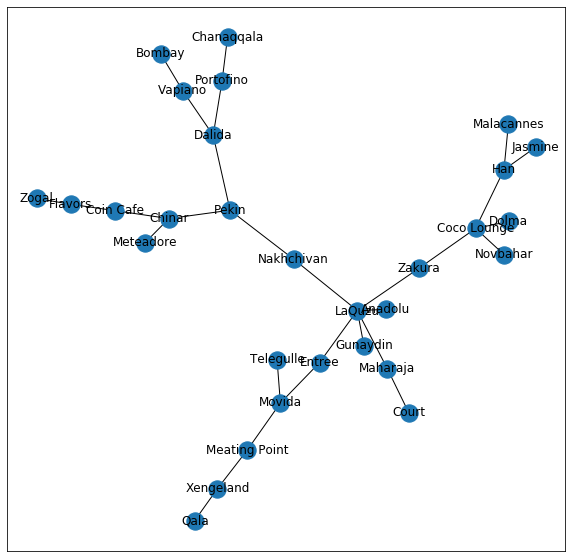

CPU times: user 3.08 s, sys: 55.4 ms, total: 3.13 s
Wall time: 3.13 s


In [34]:
%%time
prim_mst_df = pd.DataFrame.from_dict(prim_mst_dictionary)
graph_mst_graph = nx.from_pandas_edgelist(prim_mst_df, source="source", target="target", edge_attr=True)
plt.figure(figsize=(10,10))
nx.draw_networkx(graph_mst_graph, with_labels=True)
plt.savefig('prim_mst.png', dpi=500, bbox_inches='tight')
plt.show()

### Initialization of Kruskal's algorithm

In [35]:
%%time
kruskal_mst = tree.minimum_spanning_edges(graph_resto, algorithm="kruskal",weight='dist')
kruskal_mst_dictionary = {'source':[],'target':[],'dist':[]}
cost = 0
for i in kruskal_mst:
    kruskal_mst_dictionary['source'].append(i[2]['source'])
    kruskal_mst_dictionary['target'].append(i[2]['target'])
    kruskal_mst_dictionary['dist'].append(float(i[2]['dist']))
    cost += float(i[2]['dist'])
print(cost)

33.03999999999999
CPU times: user 5.16 ms, sys: 0 ns, total: 5.16 ms
Wall time: 4.88 ms


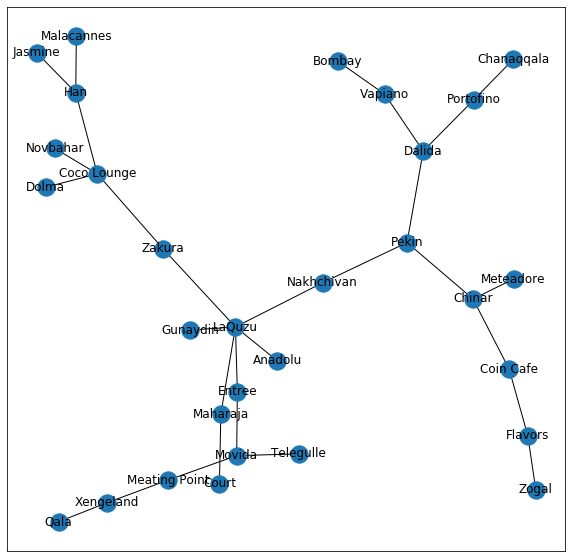

CPU times: user 3.17 s, sys: 67.2 ms, total: 3.23 s
Wall time: 3.24 s


In [36]:
%%time
kruskal_mst_df = pd.DataFrame.from_dict(kruskal_mst_dictionary)
graph_kruskal_graph = nx.from_pandas_edgelist(kruskal_mst_df, source="source", target="target", edge_attr=True)
plt.figure(figsize=(10,10))
nx.draw_networkx(graph_kruskal_graph, with_labels=True)
plt.savefig('kruskal_mst.png', dpi=500, bbox_inches='tight')
plt.show()

## Single Source Shortest Path Algorithms

### Implementation of Dijkstra Algorithm

In [37]:
def unvisiteds(graph,start_vertex):
    non_visited,parent = {},{}
    for j in list(graph.nodes()):
        non_visited[j] = inf
        parent[j] = None
    non_visited[start_vertex] = 0
    return non_visited,parent
def dijkstra(graph,start_vertex,end_vertex,attribute):
    non_vis,parents = unvisiteds(graph,start_vertex)
    path,shortest_value = [], 0
    list_nodes = list(graph.nodes())
    while True:
        for node in list_nodes:
            for neighbor in graph.neighbors(node):
                if (non_vis[node]!=inf) and (non_vis[node]+graph.edges[node,neighbor][attribute] < non_vis[neighbor]):
                    non_vis[neighbor] = non_vis[node] + graph.edges[node,neighbor][attribute]
                    parents[neighbor] = node
        list_nodes.remove(node)
        if(len(list_nodes)==0):
            break
    last = end_vertex
    while True:
        path.append(last)
        last = parents[last]
        if(last == start_vertex):
            break
    path.append(start_vertex)
    for i in range(len(path)-1):
        shortest_value += graph.edges[path[i],path[i+1]][attribute]
    return list(reversed(path)),shortest_value

In [38]:
%%time
for i in range(len(list(graph_resto.nodes()))):
    for j in range(len(list(graph_resto.nodes()))):
        if i == j:
            continue
        print(dijkstra(graph_resto,list(graph_resto.nodes())[i],list(graph_resto.nodes())[j],'dist'))

(['Coin Cafe', 'Chinar', 'Meating Point', 'Jasmine'], 4.02)
(['Coin Cafe', 'Flavors', 'Telegulle'], 3.0199999999999996)
(['Coin Cafe', 'Bombay'], 3.58)
(['Coin Cafe', 'Movida'], 2.59)
(['Coin Cafe', 'Nakhchivan'], 2.57)
(['Coin Cafe', 'Chinar', 'Pekin', 'Dalida', 'Portofino'], 4.33)
(['Coin Cafe', 'Meteadore'], 1.26)
(['Coin Cafe', 'Malacannes'], 3.74)
(['Coin Cafe', 'Meteadore', 'Xengeland'], 2.76)
(['Coin Cafe', 'Flavors', 'Dolma'], 3.53)
(['Coin Cafe', 'Meteadore', 'Entree'], 2.74)
(['Coin Cafe', 'Novbahar'], 2.61)
(['Coin Cafe', 'Chinar', 'Pekin'], 1.94)
(['Coin Cafe', 'Flavors', 'Zogal', 'Anadolu'], 4.55)
(['Coin Cafe', 'Chinar', 'Meating Point'], 2.2)
(['Coin Cafe', 'Chinar', 'Pekin', 'Chanaqqala'], 4.029999999999999)
(['Coin Cafe', 'Chinar'], 0.75)
(['Coin Cafe', 'Chinar', 'Qala', 'Gunaydin'], 4.24)
(['Coin Cafe', 'Meteadore', 'Zakura'], 3.83)
(['Coin Cafe', 'Flavors'], 1.13)
(['Coin Cafe', 'Chinar', 'Qala'], 2.34)
(['Coin Cafe', 'Flavors', 'Zogal'], 2.37)
(['Coin Cafe', 'Movida

(['Portofino', 'Dalida', 'Pekin', 'Chinar'], 3.5799999999999996)
(['Portofino', 'Movida', 'LaQuzu', 'Gunaydin'], 4.1)
(['Portofino', 'Zakura'], 2.67)
(['Portofino', 'Dalida', 'Pekin', 'Flavors'], 4.08)
(['Portofino', 'Movida', 'Xengeland', 'Qala'], 4.05)
(['Portofino', 'Movida', 'Zogal'], 4.3100000000000005)
(['Portofino', 'Coco Lounge'], 2.73)
(['Portofino', 'Coco Lounge', 'Han'], 3.88)
(['Portofino', 'Dalida', 'Vapiano'], 2.1799999999999997)
(['Portofino', 'Dalida', 'Maharaja'], 3.2199999999999998)
(['Portofino', 'Dalida'], 1.44)
(['Portofino', 'Movida', 'LaQuzu'], 3.21)
(['Portofino', 'Chanaqqala', 'Court'], 4.0)
(['Meteadore', 'Coin Cafe'], 1.26)
(['Meteadore', 'Entree', 'Jasmine'], 3.33)
(['Meteadore', 'Entree', 'Movida', 'Telegulle'], 3.1)
(['Meteadore', 'Xengeland', 'Qala', 'Bombay'], 4.21)
(['Meteadore', 'Entree', 'Movida'], 2.31)
(['Meteadore', 'Chinar', 'Nakhchivan'], 3.2299999999999995)
(['Meteadore', 'Entree', 'Movida', 'Portofino'], 4.13)
(['Meteadore', 'Malacannes'], 3.43

(['Pekin', 'Chinar', 'Meteadore'], 2.41)
(['Pekin', 'Dalida', 'Malacannes'], 3.9299999999999997)
(['Pekin', 'Chinar', 'Qala', 'Xengeland'], 3.4899999999999998)
(['Pekin', 'Dolma'], 1.83)
(['Pekin', 'Nakhchivan', 'LaQuzu', 'Entree'], 3.16)
(['Pekin', 'Chanaqqala', 'Novbahar'], 3.61)
(['Pekin', 'Nakhchivan', 'LaQuzu', 'Anadolu'], 4.08)
(['Pekin', 'Chinar', 'Meating Point'], 2.6399999999999997)
(['Pekin', 'Chanaqqala'], 2.09)
(['Pekin', 'Chinar'], 1.19)
(['Pekin', 'Nakhchivan', 'LaQuzu', 'Gunaydin'], 3.1399999999999997)
(['Pekin', 'Dalida', 'Zakura'], 2.7800000000000002)
(['Pekin', 'Flavors'], 1.69)
(['Pekin', 'Chinar', 'Qala'], 2.7800000000000002)
(['Pekin', 'Flavors', 'Zogal'], 2.9299999999999997)
(['Pekin', 'Vapiano', 'Coco Lounge'], 2.6)
(['Pekin', 'Han'], 3.0)
(['Pekin', 'Vapiano'], 1.06)
(['Pekin', 'Dalida', 'Maharaja'], 2.73)
(['Pekin', 'Dalida'], 0.95)
(['Pekin', 'Nakhchivan', 'LaQuzu'], 2.25)
(['Pekin', 'Dalida', 'Maharaja', 'Court'], 3.83)
(['Anadolu', 'Zogal', 'Flavors', 'Coin 

(['Zakura', 'Coco Lounge', 'Vapiano'], 2.5300000000000002)
(['Zakura', 'LaQuzu', 'Maharaja'], 2.41)
(['Zakura', 'Dalida'], 1.83)
(['Zakura', 'LaQuzu'], 0.74)
(['Zakura', 'LaQuzu', 'Maharaja', 'Court'], 3.51)
(['Flavors', 'Coin Cafe'], 1.13)
(['Flavors', 'Jasmine'], 2.99)
(['Flavors', 'Telegulle'], 1.89)
(['Flavors', 'Vapiano', 'Bombay'], 3.2399999999999998)
(['Flavors', 'Telegulle', 'Movida'], 2.6799999999999997)
(['Flavors', 'Pekin', 'Nakhchivan'], 2.7800000000000002)
(['Flavors', 'Pekin', 'Dalida', 'Portofino'], 4.08)
(['Flavors', 'Coin Cafe', 'Meteadore'], 2.3899999999999997)
(['Flavors', 'Han', 'Malacannes'], 3.08)
(['Flavors', 'Qala', 'Xengeland'], 3.56)
(['Flavors', 'Dolma'], 2.4)
(['Flavors', 'Zogal', 'Entree'], 3.21)
(['Flavors', 'Coin Cafe', 'Novbahar'], 3.7399999999999998)
(['Flavors', 'Pekin'], 1.69)
(['Flavors', 'Zogal', 'Anadolu'], 3.42)
(['Flavors', 'Coin Cafe', 'Chinar', 'Meating Point'], 3.33)
(['Flavors', 'Pekin', 'Chanaqqala'], 3.78)
(['Flavors', 'Coin Cafe', 'Chinar'

(['Maharaja', 'Movida', 'Zogal'], 4.45)
(['Maharaja', 'Movida', 'Coco Lounge'], 3.2)
(['Maharaja', 'Han'], 2.36)
(['Maharaja', 'Dalida', 'Vapiano'], 2.52)
(['Maharaja', 'Dalida'], 1.78)
(['Maharaja', 'LaQuzu'], 1.67)
(['Maharaja', 'Court'], 1.1)
(['Dalida', 'Pekin', 'Chinar', 'Coin Cafe'], 2.8899999999999997)
(['Dalida', 'Pekin', 'Jasmine'], 3.71)
(['Dalida', 'Movida', 'Telegulle'], 3.66)
(['Dalida', 'Vapiano', 'Bombay'], 1.72)
(['Dalida', 'Movida'], 2.87)
(['Dalida', 'Pekin', 'Nakhchivan'], 2.04)
(['Dalida', 'Portofino'], 1.44)
(['Dalida', 'Pekin', 'Chinar', 'Meteadore'], 3.3600000000000003)
(['Dalida', 'Malacannes'], 2.98)
(['Dalida', 'Movida', 'Xengeland'], 4.390000000000001)
(['Dalida', 'Pekin', 'Dolma'], 2.7800000000000002)
(['Dalida', 'Zakura', 'LaQuzu', 'Entree'], 3.48)
(['Dalida', 'Vapiano', 'Novbahar'], 3.33)
(['Dalida', 'Pekin'], 0.95)
(['Dalida', 'Zakura', 'LaQuzu', 'Anadolu'], 4.4)
(['Dalida', 'Pekin', 'Chinar', 'Meating Point'], 3.59)
(['Dalida', 'Portofino', 'Chanaqqala']

### Implementation of Belman Ford Algorithm

In [39]:
def bellman_ford(graph, start_vertex,end_vertex,attribute):
        non_vis,parents = unvisiteds(graph,start_vertex)
        list_nodes = list(graph.nodes())
        path,shortest_value = [],0
        while True:
            for node in list_nodes:
                for neighbor in graph.neighbors(node):
                    if (non_vis[node]!=inf) and (non_vis[node]+graph.edges[node,neighbor][attribute] < non_vis[neighbor]):
                        non_vis[neighbor] = non_vis[node] + graph.edges[node,neighbor][attribute]
                        parents[neighbor] = node
            list_nodes.remove(node)
            if(len(list_nodes)==0):
                break
        for node in list_nodes:
                for neighbor in graph.neighbors(node):
                    if (non_vis[node] != inf) and (non_vis[node]+graph.edges[node,neighbor][attribute]<non_vis[neighbor]):
                        print('Negative Cycle')
                        return
        
        last = end_vertex
        while True:
            path.append(last)
            last = parents[last]
            if(last == start_vertex):
                break
        path.append(start_vertex)
        for i in range(len(path)-1):
            shortest_value += graph.edges[path[i],path[i+1]][attribute]
        return list(reversed(path)),shortest_value

In [40]:
%%time
for i in range(len(list(graph_resto.nodes()))):
    for j in range(len(list(graph_resto.nodes()))):
        if i == j:
            continue
        print(bellman_ford(graph_resto,list(graph_resto.nodes())[i],list(graph_resto.nodes())[j],'dist'))

(['Coin Cafe', 'Chinar', 'Meating Point', 'Jasmine'], 4.02)
(['Coin Cafe', 'Flavors', 'Telegulle'], 3.0199999999999996)
(['Coin Cafe', 'Bombay'], 3.58)
(['Coin Cafe', 'Movida'], 2.59)
(['Coin Cafe', 'Nakhchivan'], 2.57)
(['Coin Cafe', 'Chinar', 'Pekin', 'Dalida', 'Portofino'], 4.33)
(['Coin Cafe', 'Meteadore'], 1.26)
(['Coin Cafe', 'Malacannes'], 3.74)
(['Coin Cafe', 'Meteadore', 'Xengeland'], 2.76)
(['Coin Cafe', 'Flavors', 'Dolma'], 3.53)
(['Coin Cafe', 'Meteadore', 'Entree'], 2.74)
(['Coin Cafe', 'Novbahar'], 2.61)
(['Coin Cafe', 'Chinar', 'Pekin'], 1.94)
(['Coin Cafe', 'Flavors', 'Zogal', 'Anadolu'], 4.55)
(['Coin Cafe', 'Chinar', 'Meating Point'], 2.2)
(['Coin Cafe', 'Chinar', 'Pekin', 'Chanaqqala'], 4.029999999999999)
(['Coin Cafe', 'Chinar'], 0.75)
(['Coin Cafe', 'Chinar', 'Qala', 'Gunaydin'], 4.24)
(['Coin Cafe', 'Meteadore', 'Zakura'], 3.83)
(['Coin Cafe', 'Flavors'], 1.13)
(['Coin Cafe', 'Chinar', 'Qala'], 2.34)
(['Coin Cafe', 'Flavors', 'Zogal'], 2.37)
(['Coin Cafe', 'Movida

(['Portofino', 'Dalida', 'Pekin', 'Dolma'], 4.220000000000001)
(['Portofino', 'Movida', 'Entree'], 2.65)
(['Portofino', 'Chanaqqala', 'Novbahar'], 2.9)
(['Portofino', 'Dalida', 'Pekin'], 2.3899999999999997)
(['Portofino', 'Movida', 'LaQuzu', 'Anadolu'], 5.04)
(['Portofino', 'Movida', 'Meating Point'], 3.13)
(['Portofino', 'Chanaqqala'], 1.38)
(['Portofino', 'Dalida', 'Pekin', 'Chinar'], 3.5799999999999996)
(['Portofino', 'Movida', 'LaQuzu', 'Gunaydin'], 4.1)
(['Portofino', 'Zakura'], 2.67)
(['Portofino', 'Dalida', 'Pekin', 'Flavors'], 4.08)
(['Portofino', 'Movida', 'Xengeland', 'Qala'], 4.05)
(['Portofino', 'Movida', 'Zogal'], 4.3100000000000005)
(['Portofino', 'Coco Lounge'], 2.73)
(['Portofino', 'Coco Lounge', 'Han'], 3.88)
(['Portofino', 'Dalida', 'Vapiano'], 2.1799999999999997)
(['Portofino', 'Dalida', 'Maharaja'], 3.2199999999999998)
(['Portofino', 'Dalida'], 1.44)
(['Portofino', 'Movida', 'LaQuzu'], 3.21)
(['Portofino', 'Chanaqqala', 'Court'], 4.0)
(['Meteadore', 'Coin Cafe'], 1.

(['Novbahar', 'Vapiano'], 2.59)
(['Novbahar', 'Court', 'Maharaja'], 3.1)
(['Novbahar', 'Vapiano', 'Dalida'], 3.33)
(['Novbahar', 'Coco Lounge', 'LaQuzu'], 3.02)
(['Novbahar', 'Court'], 2.0)
(['Pekin', 'Chinar', 'Coin Cafe'], 1.94)
(['Pekin', 'Jasmine'], 2.76)
(['Pekin', 'Flavors', 'Telegulle'], 3.58)
(['Pekin', 'Vapiano', 'Bombay'], 2.04)
(['Pekin', 'Movida'], 3.12)
(['Pekin', 'Nakhchivan'], 1.09)
(['Pekin', 'Dalida', 'Portofino'], 2.3899999999999997)
(['Pekin', 'Chinar', 'Meteadore'], 2.41)
(['Pekin', 'Dalida', 'Malacannes'], 3.9299999999999997)
(['Pekin', 'Chinar', 'Qala', 'Xengeland'], 3.4899999999999998)
(['Pekin', 'Dolma'], 1.83)
(['Pekin', 'Nakhchivan', 'LaQuzu', 'Entree'], 3.16)
(['Pekin', 'Chanaqqala', 'Novbahar'], 3.61)
(['Pekin', 'Nakhchivan', 'LaQuzu', 'Anadolu'], 4.08)
(['Pekin', 'Chinar', 'Meating Point'], 2.6399999999999997)
(['Pekin', 'Chanaqqala'], 2.09)
(['Pekin', 'Chinar'], 1.19)
(['Pekin', 'Nakhchivan', 'LaQuzu', 'Gunaydin'], 3.1399999999999997)
(['Pekin', 'Dalida', 

(['Zakura', 'Meteadore', 'Chinar'], 3.79)
(['Zakura', 'Gunaydin'], 1.52)
(['Zakura', 'Han', 'Flavors'], 3.38)
(['Zakura', 'Gunaydin', 'Qala'], 3.42)
(['Zakura', 'LaQuzu', 'Entree', 'Zogal'], 3.62)
(['Zakura', 'Coco Lounge'], 0.99)
(['Zakura', 'Han'], 1.44)
(['Zakura', 'Coco Lounge', 'Vapiano'], 2.5300000000000002)
(['Zakura', 'LaQuzu', 'Maharaja'], 2.41)
(['Zakura', 'Dalida'], 1.83)
(['Zakura', 'LaQuzu'], 0.74)
(['Zakura', 'LaQuzu', 'Maharaja', 'Court'], 3.51)
(['Flavors', 'Coin Cafe'], 1.13)
(['Flavors', 'Jasmine'], 2.99)
(['Flavors', 'Telegulle'], 1.89)
(['Flavors', 'Vapiano', 'Bombay'], 3.2399999999999998)
(['Flavors', 'Telegulle', 'Movida'], 2.6799999999999997)
(['Flavors', 'Pekin', 'Nakhchivan'], 2.7800000000000002)
(['Flavors', 'Pekin', 'Dalida', 'Portofino'], 4.08)
(['Flavors', 'Coin Cafe', 'Meteadore'], 2.3899999999999997)
(['Flavors', 'Han', 'Malacannes'], 3.08)
(['Flavors', 'Qala', 'Xengeland'], 3.56)
(['Flavors', 'Dolma'], 2.4)
(['Flavors', 'Zogal', 'Entree'], 3.21)
(['Flavo

(['Maharaja', 'Chinar'], 1.86)
(['Maharaja', 'LaQuzu', 'Gunaydin'], 2.56)
(['Maharaja', 'LaQuzu', 'Zakura'], 2.41)
(['Maharaja', 'Chinar', 'Coin Cafe', 'Flavors'], 3.74)
(['Maharaja', 'Chinar', 'Qala'], 3.45)
(['Maharaja', 'Movida', 'Zogal'], 4.45)
(['Maharaja', 'Movida', 'Coco Lounge'], 3.2)
(['Maharaja', 'Han'], 2.36)
(['Maharaja', 'Dalida', 'Vapiano'], 2.52)
(['Maharaja', 'Dalida'], 1.78)
(['Maharaja', 'LaQuzu'], 1.67)
(['Maharaja', 'Court'], 1.1)
(['Dalida', 'Pekin', 'Chinar', 'Coin Cafe'], 2.8899999999999997)
(['Dalida', 'Pekin', 'Jasmine'], 3.71)
(['Dalida', 'Movida', 'Telegulle'], 3.66)
(['Dalida', 'Vapiano', 'Bombay'], 1.72)
(['Dalida', 'Movida'], 2.87)
(['Dalida', 'Pekin', 'Nakhchivan'], 2.04)
(['Dalida', 'Portofino'], 1.44)
(['Dalida', 'Pekin', 'Chinar', 'Meteadore'], 3.3600000000000003)
(['Dalida', 'Malacannes'], 2.98)
(['Dalida', 'Movida', 'Xengeland'], 4.390000000000001)
(['Dalida', 'Pekin', 'Dolma'], 2.7800000000000002)
(['Dalida', 'Zakura', 'LaQuzu', 'Entree'], 3.48)
(['

### Networkx builtin Shortest Path

In [41]:
%%time
for i in range(len(list(graph_resto.nodes()))):
    for j in range(len(list(graph_resto.nodes()))):
        if i == j:
            continue
        print(nx.shortest_path(graph_resto, source=list(graph_resto.nodes())[i], target=list(graph_resto.nodes())[j], weight='dist'))


['Coin Cafe', 'Chinar', 'Meating Point', 'Jasmine']
['Coin Cafe', 'Flavors', 'Telegulle']
['Coin Cafe', 'Bombay']
['Coin Cafe', 'Movida']
['Coin Cafe', 'Nakhchivan']
['Coin Cafe', 'Chinar', 'Pekin', 'Dalida', 'Portofino']
['Coin Cafe', 'Meteadore']
['Coin Cafe', 'Malacannes']
['Coin Cafe', 'Meteadore', 'Xengeland']
['Coin Cafe', 'Flavors', 'Dolma']
['Coin Cafe', 'Meteadore', 'Entree']
['Coin Cafe', 'Novbahar']
['Coin Cafe', 'Chinar', 'Pekin']
['Coin Cafe', 'Flavors', 'Zogal', 'Anadolu']
['Coin Cafe', 'Chinar', 'Meating Point']
['Coin Cafe', 'Chinar', 'Pekin', 'Chanaqqala']
['Coin Cafe', 'Chinar']
['Coin Cafe', 'Chinar', 'Qala', 'Gunaydin']
['Coin Cafe', 'Meteadore', 'Zakura']
['Coin Cafe', 'Flavors']
['Coin Cafe', 'Chinar', 'Qala']
['Coin Cafe', 'Flavors', 'Zogal']
['Coin Cafe', 'Movida', 'Coco Lounge']
['Coin Cafe', 'Flavors', 'Han']
['Coin Cafe', 'Chinar', 'Pekin', 'Vapiano']
['Coin Cafe', 'Chinar', 'Maharaja']
['Coin Cafe', 'Chinar', 'Pekin', 'Dalida']
['Coin Cafe', 'Meteadore', 'En

['Dalida', 'Zakura', 'Han']
['Dalida', 'Vapiano']
['Dalida', 'Maharaja']
['Dalida', 'Zakura', 'LaQuzu']
['Dalida', 'Maharaja', 'Court']
['LaQuzu', 'Entree', 'Meteadore', 'Coin Cafe']
['LaQuzu', 'Entree', 'Jasmine']
['LaQuzu', 'Movida', 'Telegulle']
['LaQuzu', 'Bombay']
['LaQuzu', 'Movida']
['LaQuzu', 'Nakhchivan']
['LaQuzu', 'Movida', 'Portofino']
['LaQuzu', 'Entree', 'Meteadore']
['LaQuzu', 'Malacannes']
['LaQuzu', 'Gunaydin', 'Xengeland']
['LaQuzu', 'Coco Lounge', 'Dolma']
['LaQuzu', 'Entree']
['LaQuzu', 'Coco Lounge', 'Novbahar']
['LaQuzu', 'Nakhchivan', 'Pekin']
['LaQuzu', 'Anadolu']
['LaQuzu', 'Movida', 'Meating Point']
['LaQuzu', 'Gunaydin', 'Chanaqqala']
['LaQuzu', 'Nakhchivan', 'Chinar']
['LaQuzu', 'Gunaydin']
['LaQuzu', 'Zakura']
['LaQuzu', 'Nakhchivan', 'Pekin', 'Flavors']
['LaQuzu', 'Gunaydin', 'Qala']
['LaQuzu', 'Entree', 'Zogal']
['LaQuzu', 'Coco Lounge']
['LaQuzu', 'Zakura', 'Han']
['LaQuzu', 'Coco Lounge', 'Vapiano']
['LaQuzu', 'Maharaja']
['LaQuzu', 'Zakura', 'Dalida']


## Hamiltonian Path Example

### Initialization of Hamiltionian Path

In [42]:
visited = ['Coin Cafe']
path = ['Coin Cafe']
hamiltonian = ""
def hamilto_path(graph,node,path,visited):
    if(len(path)==30):
        global hamiltonian
        hamiltonian = path
        return 
    for nod in graph.neighbors(node):
        if nod not in visited:
            path.append(nod)
            visited.append(nod)
            hamilto_path(graph,nod,path,visited)
hamilto_path(graph_resto,'Coin Cafe',path,visited)

### Demonstration of Hamiltonian Path

In [43]:
len(hamiltonian)

30

In [47]:
graph_nodes = []
hamilto_cost = 0
for i in range(len(list(graph_resto.nodes))):
    if list(graph_resto.nodes)[i] not in graph_nodes:
        graph_nodes.append(list(graph_resto.nodes)[i])
        
hamilto_dict = {'source':[],'target':[],'dist':[]}
# b.append(0)
# pure_nodes.append(pure_nodes[0])
for i in range(1,len(hamiltonian)):
    hamilto_dict['source'].append(hamiltonian[i-1])
    hamilto_dict['target'].append(hamiltonian[i])
    hamilto_cost += float(graph_resto.edges[hamiltonian[i-1],hamiltonian[i]]['dist'])
    hamilto_dict['dist'].append(float(graph_resto.edges[hamiltonian[i-1],hamiltonian[i]]['dist']))
print(hamilto_cost)

156.15999999999997


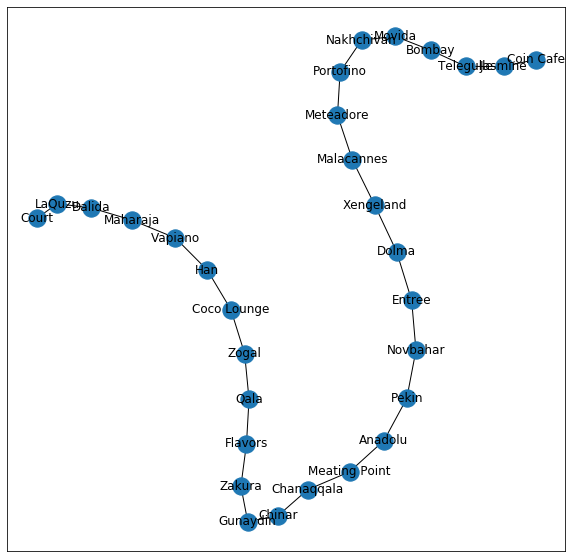

In [48]:
hamilto_frame = pd.DataFrame.from_dict(hamilto_dict)
graph_hamilto = nx.from_pandas_edgelist(hamilto_frame, source="source", target="target", edge_attr=True)
plt.figure(figsize=(10,10))
nx.draw_networkx(graph_hamilto, with_labels=True)
plt.savefig('graph_hamilto.png', dpi=500, bbox_inches='tight')
plt.show()

## Travelling Salesman Problem

Creation of Distance matrix

In [49]:
len(list(nx.nodes(graph_resto)))
nodes = []
dist_matrix = np.zeros((len(list(nx.nodes(graph_resto))),len(list(nx.nodes(graph_resto)))))
for i in range(dist_matrix.shape[0]):
    for j in range(dist_matrix.shape[0]):
        if(i==j):
            dist_matrix[i][j] = 0
            continue
        dist_matrix[i][j] = float(graph_resto.edges[list(graph_resto.nodes)[i],list(graph_resto.nodes)[j]]['dist'])
        nodes.append([list(graph_resto.nodes)[i],list(graph_resto.nodes)[j]])
        

In [50]:
r = range(len(dist_matrix))

In [51]:
dist = {(i, j): dist_matrix[i][j] for i in r for j in r}

In [58]:
_,b = tsp.tsp(r, dist)
tsp_cost = 0
new_dictionary = {'source':[],'target':[],'dist':[]}
pure_nodes = []
for n in list((np.array(nodes)[:,0])):
    if n in pure_nodes:
        continue
    pure_nodes.append(n)
b.append(0)
pure_nodes.append(pure_nodes[0])
for i in range(1,len(b)):
    new_dictionary['source'].append(pure_nodes[b[i-1]])
    new_dictionary['target'].append(pure_nodes[b[i]])
    tsp_cost += float(graph_resto.edges[pure_nodes[b[i-1]],pure_nodes[b[i]]]['dist'])
    new_dictionary['dist'].append(float(graph_resto.edges[pure_nodes[b[i-1]],pure_nodes[b[i]]]['dist']))
print(tsp_cost)

41.42000000000001


In [59]:
tsp_frame = pd.DataFrame.from_dict(new_dictionary)

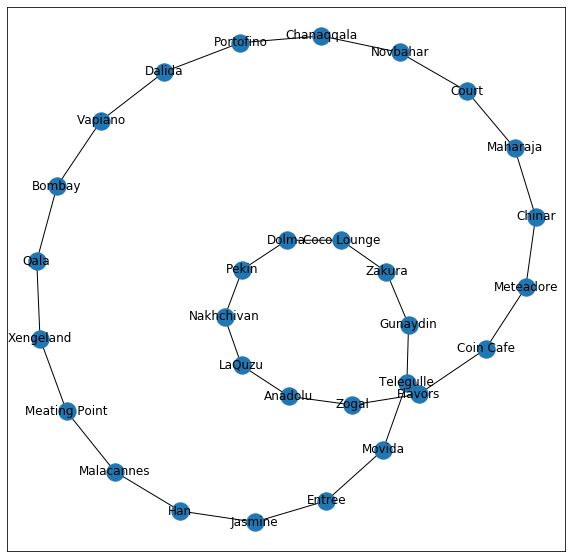

In [60]:
graph_tsp = nx.from_pandas_edgelist(tsp_frame, source="source", target="target", edge_attr=True)
plt.figure(figsize=(10,10))
nx.draw_networkx(graph_tsp, with_labels=True)
plt.savefig('graph_tsp.png', dpi=500, bbox_inches='tight')
plt.show()